In [7]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
import librosa as lr
import librosa.feature as lrf
from scipy.signal import welch
import pywt
from pywt import *
from scipy.signal import periodogram
#from pyemd import emd
from scipy.signal import hilbert
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import nolds
from pyentrp import entropy as ent
from scipy.signal import detrend
from nolds import dfa

In [8]:
dataset_path = 'drowsiness-dataset.mat' # changed to relative path
data_dict = scipy.io.loadmat(dataset_path)
subjects = list(data_dict["subindex"])
states = [i[0] for i in data_dict["substate"]]
eeg = data_dict["EEGsample"]

In [9]:
channel_names =  ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "FT7", "FC3", "FCZ", "FC4", "FT8", "T3", "C3", "Cz", "C4", "T4", "TP7", "CP3", "CPz", "CP4", "TP8", "T5", "P3", "PZ", "P4", "T6", "O1", "Oz" , "O2"]
channel_idx =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
channel_names = dict(zip(channel_names, channel_idx))

def select_channel(data, channel_list):
    selection = []
    channel_col = []
    for i in range(len(channel_list)):
        selection.append(data[:, channel_names[channel_list[i]], :])
        channel_col.append([channel_list[i]] * data.shape[0])
    selected_data = np.concatenate(selection)
    channel_col = np.concatenate(channel_col)
    return selected_data, channel_col

channel_list = ['F3', 'F4', 'C3', 'Cz', 'Oz', 'Fp1', 'Fp2', 'FT7', 'F8', 'Fz', 'C4']
labels = states * len(channel_list)
data, channel_col = select_channel(eeg, channel_list)

In [10]:
test_signal = data[14342,:]

In [21]:
signal = test_signal
sr = 128
from scipy.fft import fft, fftfreq
    
# Number of sample points
N = sr*3
# sample spacing
T = 1.0 / sr

yf = fft(signal)
yf = 2.0/N * np.abs(yf[0:N//2])
yf = np.clip(yf, 0, 6.5)
#yf = np.pad(yf, 1, mode='constant')
xf = fftfreq(N, T)[:N//2]
#xf = np.pad(xf, 1, mode='constant')
yf = (yf - np.min(yf))/(np.max(yf) - np.min(yf))
peaks, _ = scipy.signal.find_peaks(yf, height=0.2)

'''
# frequency of the maximum peak    
print(xf[yf == np.max(yf[peaks])])

# maximum frequency of peaks
print(xf[peaks][len(xf[peaks]) - 1])

# peak slope
from scipy import stats
res = stats.linregress(xf[peaks], yf[peaks])
#feature_vector['slope'] = res.slope
'''

"\n# frequency of the maximum peak    \nprint(xf[yf == np.max(yf[peaks])])\n\n# maximum frequency of peaks\nprint(xf[peaks][len(xf[peaks]) - 1])\n\n# peak slope\nfrom scipy import stats\nres = stats.linregress(xf[peaks], yf[peaks])\n#feature_vector['slope'] = res.slope\n"

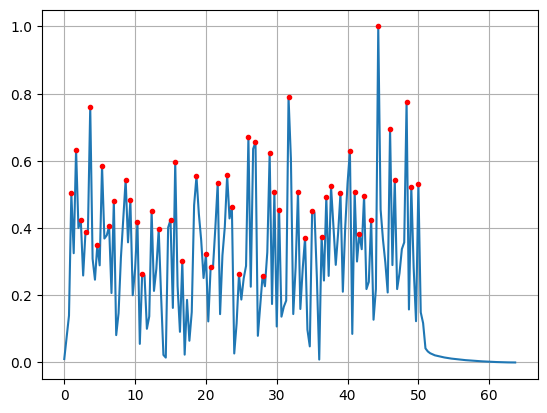

In [24]:
x = np.linspace(0.0, N*T, N, endpoint=False)



import matplotlib.pyplot as plt
plt.plot(xf, yf)


plt.plot(xf[peaks], yf[peaks], 'ro', label='Selected Points', markersize=3)
plt.grid()
plt.show()

In [121]:
signal = test_signal
sr = 128
from scipy.fft import fft, fftfreq
    
# Number of sample points
N = sr*3
# sample spacing
T = 1.0 / sr

yf = fft(signal)
yf = 2.0/N * np.abs(yf[0:N//2])

xf = fftfreq(N, T)[:N//2]

peaks, _ = scipy.signal.find_peaks(yf, height=np.max(yf * 0.35))

In [122]:
channel_names =  ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "FT7", "FC3", "FCZ", "FC4", "FT8", "T3", "C3", "Cz", "C4", "T4", "TP7", "CP3", "CPz", "CP4", "TP8", "T5", "P3", "PZ", "P4", "T6", "O1", "Oz" , "O2"]
channel_idx =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
channel_names = dict(zip(channel_names, channel_idx))

def select_channel(data, channel_list):
    selection = []
    channel_col = []
    for i in range(len(channel_list)):
        selection.append(data[:, channel_names[channel_list[i]], :])
        channel_col.append([channel_list[i]] * data.shape[0])
    selected_data = np.concatenate(selection)
    channel_col = np.concatenate(channel_col)
    return selected_data, channel_col

channel_list = ['F3', 'F4', 'C3', 'Cz', 'Oz']
labels = states * len(channel_list)
data, channel_col = select_channel(eeg, channel_list)

# extracted features np array olabilir liste yerine
import time
start = time.time()
extracted_features = []
for i in range(data.shape[0]):
    af = 2.0/N * np.abs(fft(data[i,:])[0:N//2])
    signal_features = np.max(af)
    extracted_features.append(signal_features)

end = time.time()
print(end-start)

0.08619308471679688
